In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def generate_reserve_prices(n):
    reserve_prices = np.linspace(0, 1, 100)
    normalized_reserve_prices = reserve_prices / reserve_prices.sum()
    return (np.random.choice(reserve_prices, n, p=normalized_reserve_prices) * 100) + 900


def simulate_auction(n, first_bid, second_bid):
    reserve_prices = generate_reserve_prices(n)
    n_first_bid_wins = (first_bid > reserve_prices).sum()
    first_bid_spending = n_first_bid_wins * first_bid
    reserve_prices_after_first_bid = reserve_prices[first_bid < reserve_prices]
    n_second_bid_wins = (second_bid > reserve_prices_after_first_bid).sum()
    second_bid_spending = n_second_bid_wins * second_bid
    return ((n_first_bid_wins + n_second_bid_wins) * 1000) - (first_bid_spending + second_bid_spending)

In [7]:
def find_optimal_bids(n, runs_per_combination=10):
    max_profit = -1
    optimal_bids = None
    for first_bid in tqdm(np.arange(900, 1000, 1)):
        for second_bid in np.arange(first_bid, 1000, 1):
            for _ in range(runs_per_combination):
                profit = simulate_auction(n, first_bid, second_bid)
                if profit > max_profit:
                    max_profit = profit
                    optimal_bids = (first_bid, second_bid)
    return optimal_bids, max_profit

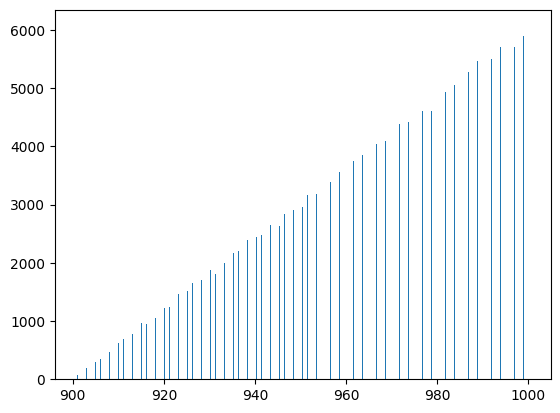

In [8]:
prices = generate_reserve_prices(300000)
#plot
plt.hist(prices, bins=1000)
plt.show()

In [9]:
def generate_second_bids(n, n_sims):
    second_prices = []
    for i in tqdm(range(n)):
        _, second_price = find_optimal_bids(n_sims)
        second_prices.append(second_price)
    second_prices = np.array(second_prices)
    return second_prices
        

def simulate_auction_round_four(n, first_bid, second_bid, sim_second_bids = True):
    reserve_prices = generate_reserve_prices(n)
    n_first_bid_wins = (first_bid > reserve_prices).sum()
    first_bid_spending = n_first_bid_wins * first_bid
    first_bid_profit = n_first_bid_wins * 1000 - first_bid_spending
    reserve_prices_after_first_bid = reserve_prices[first_bid < reserve_prices]
    avg_second_bid_round = np.mean(generate_second_bids(n, 1000)) if sim_second_bids else 978

    for price in reserve_prices_after_first_bid:
        if second_bid > price:
            p = (1000 - avg_second_bid_round) / (1000 - second_bid)
            profit = (1000 - second_bid) * p
            first_bid_profit += profit

    total_profit = first_bid_profit
    return total_profit



In [10]:
def find_optimal_bids_round_four(n, runs_per_combination=1):
    max_profit = -1
    optimal_bids = None
    for first_bid in tqdm(np.arange(900, 1000, 1)):
        for second_bid in np.arange(first_bid, 1000, 1):
            for _ in range(runs_per_combination):
                profit = simulate_auction_round_four(n, first_bid, second_bid)
                if profit > max_profit:
                    max_profit = profit
                    optimal_bids = (first_bid, second_bid)
    return optimal_bids, max_profit

n = 1000
optimal_bids, max_profit = find_optimal_bids_round_four(n)
print(f"Optimal bids: {optimal_bids}, Max profit: {max_profit}")

  0%|          | 0/100 [00:00<?, ?it/s]






















































100%|██████████| 100/100 [00:06<00:00, 14.43it/s]























































100%|██████████| 100/100 [00:06<00:00, 14.39it/s]






















































100%|██████████| 100/100 [00:06<00:00, 14.40it/s]























































100%|██████████| 100/100 [00:06<00:00, 14.49it/s]

























































100%|██████████| 100/100 [00:07<00:00, 14.27it/s]


































  0%|          | 0/100 [00:39<?, ?it/s]


KeyboardInterrupt: 